# IMDb Top Rated TV Shows (Top 250 as rated by IMDb Users)




# Outline:


*   We'll scrap https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250 
*   Get the top 250 shows' rank, title, and url(show page in IMDB)
*   For each show, by using show's url we'll get IMDb rating, number of ratings, Genre, From - To (airing years), stroy, and top casts
*   Finally, make a csv file in which all the data we scraped will be saved in the following format:
        rank, show name, IMDb page link, IMDb rating, # of ratings,genre airing years, rating system,top casts 





# the way that work will be done with:


*   Get the feature for first show 
*   make a function that get that feature for all 250 shows 



### First import the needed modules 

In [73]:
import requests # for get html structure of a web page
from bs4 import BeautifulSoup # for parse html structure and search through it 
import pandas as pd # for creating and saving files in a csv formate 

In [ ]:
# get the html structure
page_link = 'https://www.imdb.com/chart/toptv/?ref_=nv_tvv_250'
response = requests.get(page_link)
response.status_code # if it 200, then it's work

200

In [ ]:
# parse html structure 
content = BeautifulSoup(response.text, 'html.parser')

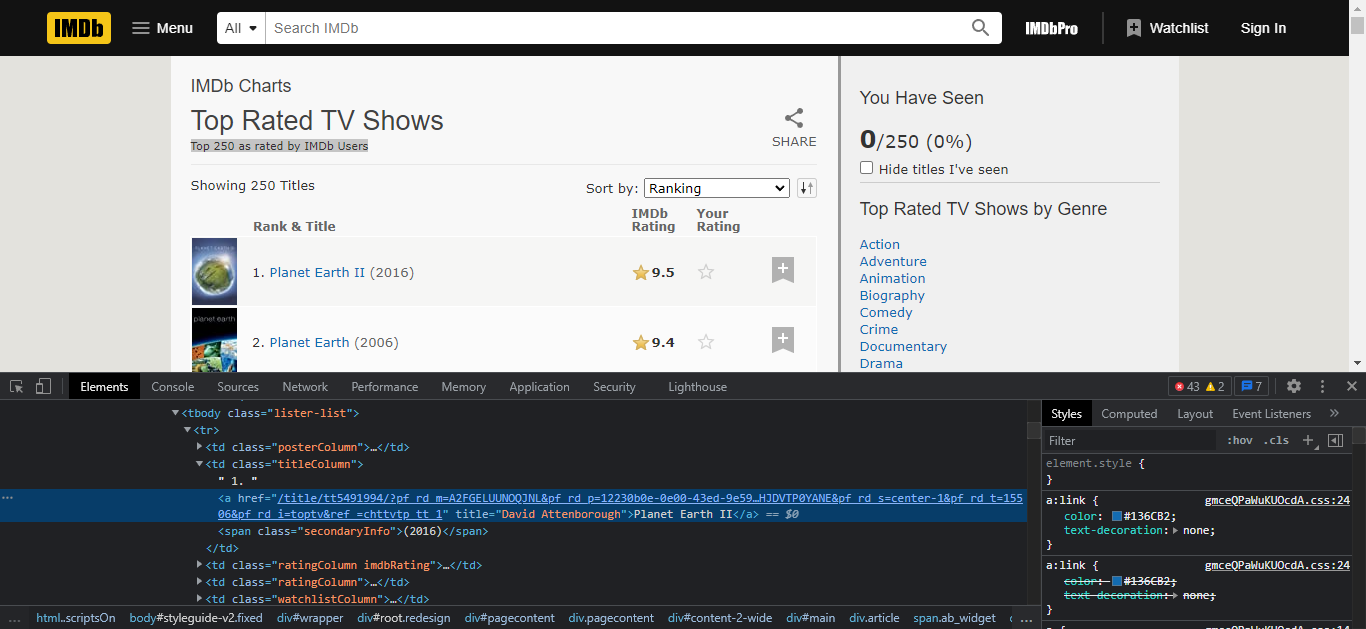

**from the image above, the rank, title, and the url for the show all are in the same class '*titleColumn*'**

**get rank, title, url for the first show**

In [ ]:
# get rank, title
first_show_tage = content.find('td', {'class':'titleColumn'})
first_show_tage

<td class="titleColumn">
      1.
      <a href="/title/tt5491994/" title="David Attenborough">Planet Earth II</a>
<span class="secondaryInfo">(2016)</span>
</td>

In [ ]:
show_title = first_show_tage.text
show_title

'\n      1.\n      Planet Earth II\n(2016)\n'

In [ ]:
dot_pos = show_title.find('.')
rank = show_title[:dot_pos].strip()
show_title = show_title[dot_pos+1:].strip().replace('\n', '')
url = 'http://imdb.com'+first_show_tage.find('a')['href']
print('rank:', rank)
print('title:', show_title)
print('url:', url)

rank: 1
title: Planet Earth II(2016)
url: http://imdb.com/title/tt5491994/


**make a function to get rank, title, url for all 250 shows**

In [ ]:
def get_title_rank_link(tag):

  '''
  input -> tag: a tag for a specific show 
  output -> title, rank, link(url) for this particular show
  '''
  title = tag.text
  dot_pos = title.find('.')
  rank = title[:dot_pos].strip()
  title = title[dot_pos+1 : ].strip().replace('\n', '')
  base_link = 'http://imdb.com'
  link = base_link + tag.find('a')['href']
  return title, rank, link

In [ ]:
def get_titles_ranks_links(content):
  '''
  input -> content: the html page parsed structure
  output -> 3 lists: titles list, ranks list, and links list
  '''
  # title, rank, link are all in the same tag's class 
  ranks =[]
  titles = []
  links = []
  title_rank_link_tags = content.find_all('td', {'class':'titleColumn'})
  for tag in title_rank_link_tags:
      title, rank, link  = title_rank_link(tag)
      titles.append(title)
      ranks.append(rank)
      links.append(link)
  return titles, ranks, links

In [ ]:
# save the ranks, titles, links data into variables with the same names 
titles , ranks, links = get_titles_ranks_links(content)

In [ ]:
titles[:5]

['Planet Earth II(2016)',
 'Planet Earth(2006)',
 'Breaking Bad(2008)',
 'Band of Brothers(2001)',
 'Chernobyl(2019)']

In [ ]:
ranks[:5]

['1', '2', '3', '4', '5']

In [ ]:
links[:5]

['http://imdb.com/title/tt5491994/',
 'http://imdb.com/title/tt0795176/',
 'http://imdb.com/title/tt0903747/',
 'http://imdb.com/title/tt0185906/',
 'http://imdb.com/title/tt7366338/']

**Now we have the titles, ranks, and urls saved in variables for later use**
**let's get the imdb rating for the first show**

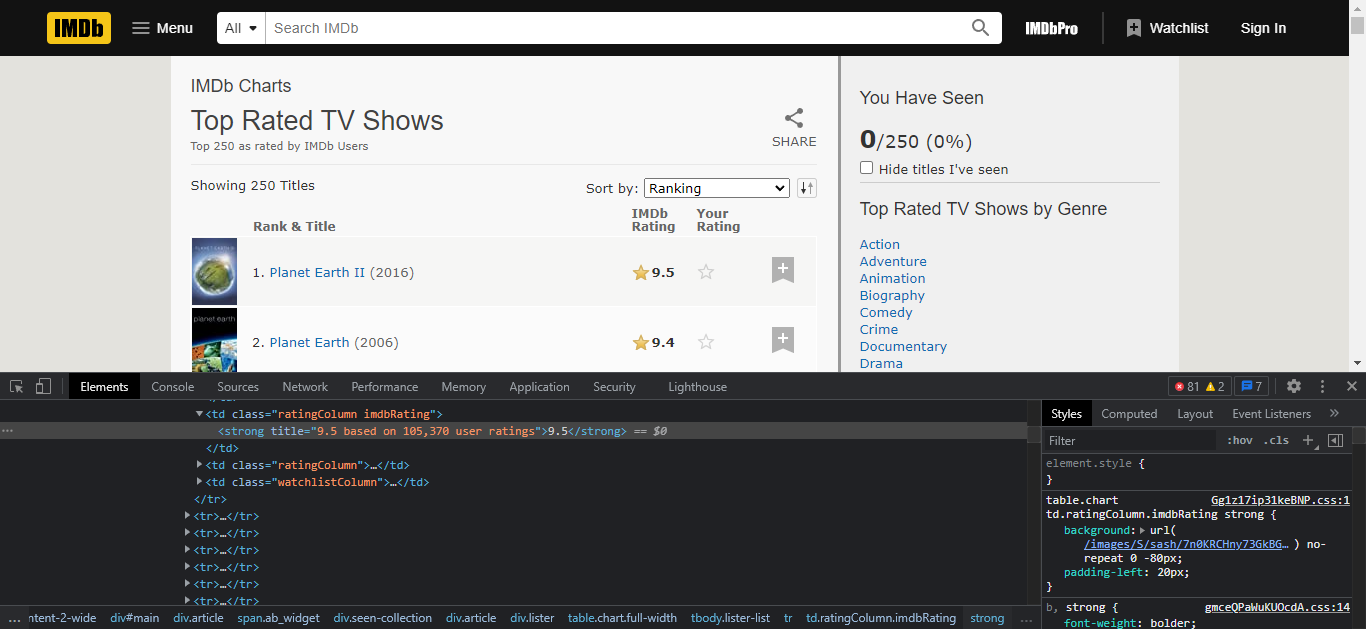

In [ ]:
rating_class = "ratingColumn imdbRating"
rating_tag = content.find('td', {'class': rating_class})
rating_tag.text.strip()

'9.5'

**make a function to get imdb rating for all shows and save the result in a list named imdb_ratings**

In [ ]:
def get_imdb_rating(content):
    rating_tags = content.find_all('td', {'class':rating_class})
    ratings = [rate.text.strip() for rate in rating_tags]
    return ratings

In [ ]:
imdb_ratings = get_imdb_rating(content)
imdb_ratings[:5]

['9.5', '9.4', '9.4', '9.4', '9.3']

**the remaining features need to be get with the url for each show**

**get the number of ratings for the first show**

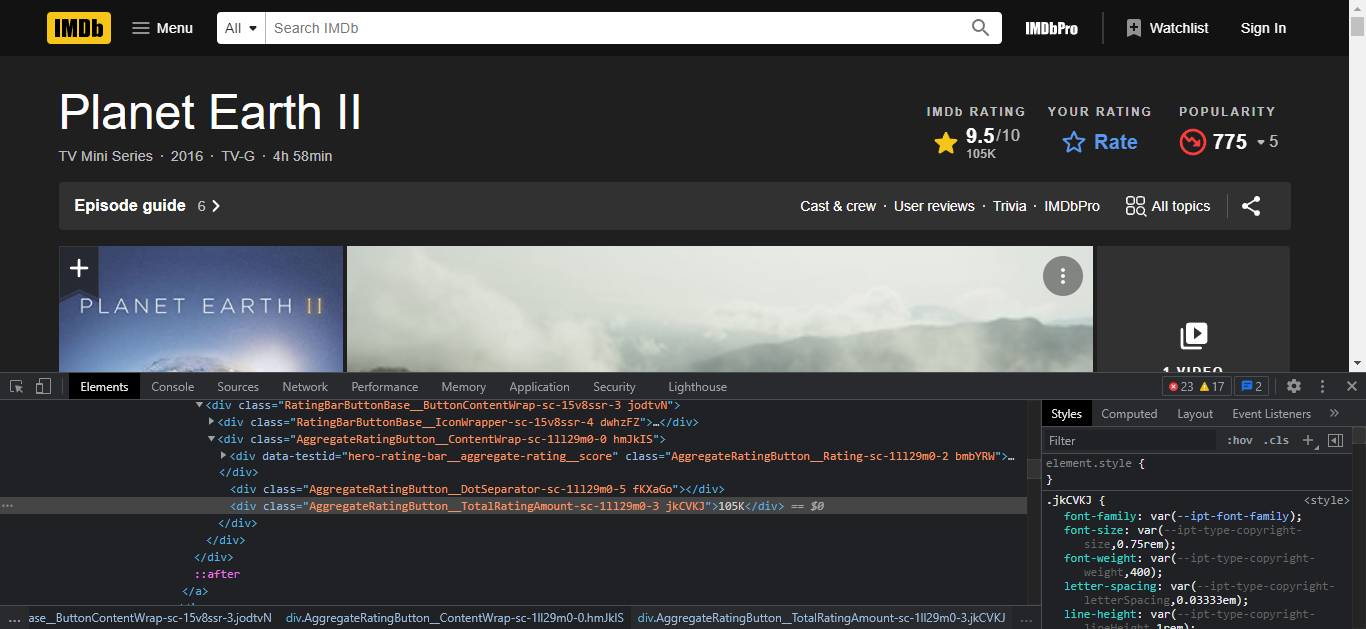

In [ ]:
first_show_content = BeautifulSoup(requests.get(links[0]).text, 'html.parser')
num_rating_class = "AggregateRatingButton__TotalRatingAmount-sc-1ll29m0-3 jkCVKJ"
num_rating_tag = first_show_content.find('div', {'class': num_rating_class})
num_rating_tag.text

'105K'

In [ ]:
# make a function to convert the num_ratings to an integer whole number. (105K -> 105000, 1.6M -> 1600000)
def convert_to_int(ratings):
  '''
  input -> ratings: a string that represent num of ratings, it may be end with K, M or nothing
  output -> the integer of the ratings
  '''
  num_of_ratings = 0
  if ratings[-1] == 'K':
      num_of_ratings = int(ratings[:-1]) * 1000
  elif ratings[-1] == 'M':
      num_of_ratings = int(float(ratings[:-1]) * 1000000)
  else: 
      num_of_ratings = int(ratings)
  return num_of_ratings

# test that function 
convert_to_int(num_rating_tag.text)

105000

**Now make a function to get num of ratings for all shows and store the result in a list named ratings** 

In [ ]:
def get_num_ratings(links):
  ''' 
  input -> links: a list of the links of shows 
  output -> ratings: a list of integers hold the number of ratings for each show 
  '''
  ratings = []
  for link in links:
    resp =  requests.get(link)
    cont = BeautifulSoup(resp.text, 'html.parser')
    rating_tag = cont.find('div', {'class':num_rating_class})
    num_of_ratings = convert_to_int(rating_tag.text) # called the convert_to_int() function
    ratings.append(num_of_ratings)
  return ratings

In [74]:
ratings = get_num_ratings(links)
ratings[:5]

[105000, 174000, 1600000, 401000, 618000]

**get the Genre of the first show**

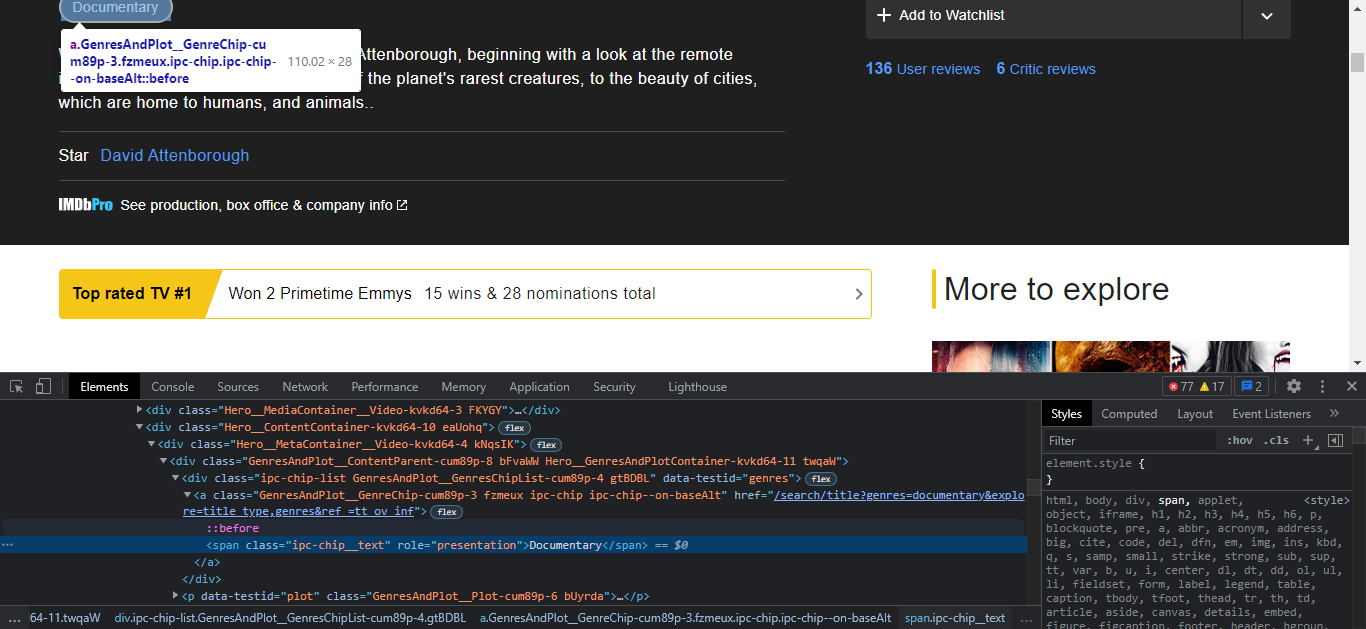

In [ ]:
genre_class = "GenresAndPlot__GenreChip-cum89p-3 fzmeux ipc-chip ipc-chip--on-baseAlt"
# one show could have more than one genre, so we will use find_all method to get all genre of the same show
genre_tag = first_show_content.find_all('a', {'class':genre_class})
genre = ', '.join([x.text for x in genre_tag])
genre 

'Documentary'

**make a function that gets the genre for each show and assign the rsult to a list named genres**

In [75]:
def get_genres(links):
  '''
  input -> links: a list of links 
  output -> genres: a list of genres for each show 
  '''
  genres = []
  for link in links:
      resp = requests.get(link)
      cont = BeautifulSoup(resp.text, 'html.parser')
      genre_tag = cont.find_all('a', {'class':genre_class})
      genre = ', '.join([x.text for x in genre_tag])
      genres.append(genre)
  return genres

In [76]:
genres = get_genres(links)
genres[:5]

['Documentary',
 'Documentary',
 'Crime, Drama, Thriller',
 'Action, Drama, History',
 'Drama, History, Thriller']

**get the airing years (from - to) for the first show**

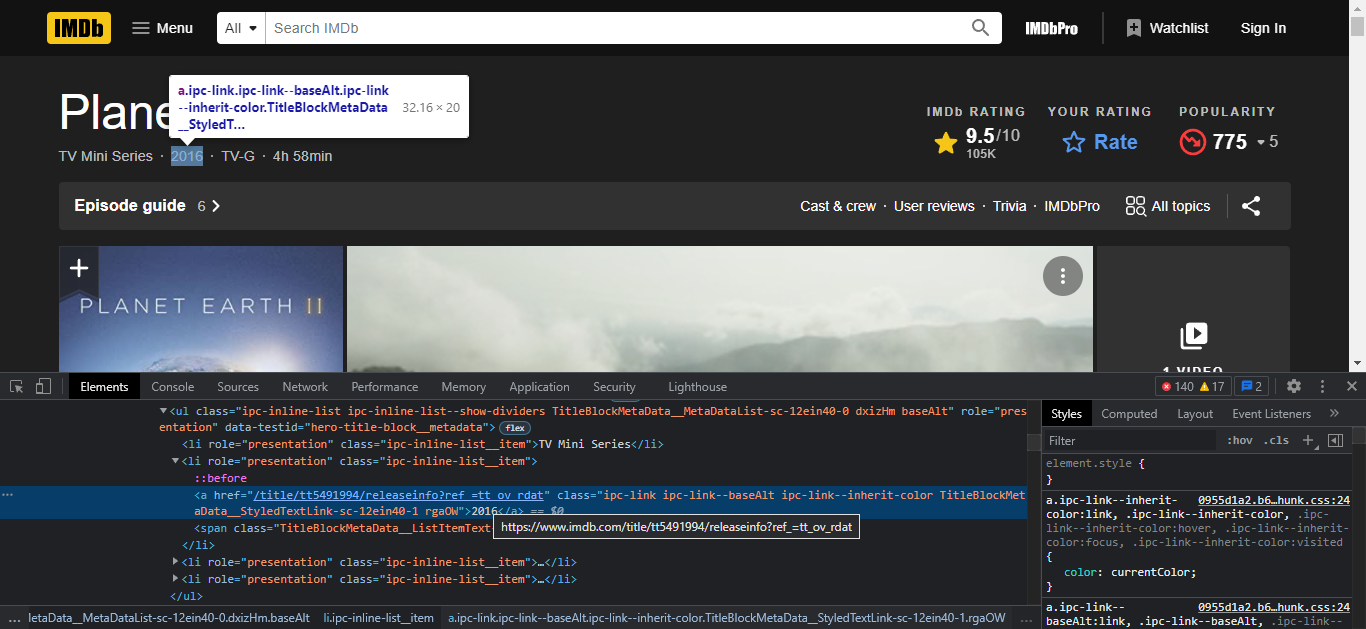

In [90]:
airing_years_class = 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'
airing_years_class_tag = first_show_content.find('span', {'class':airing_years_class})
airing_years_class_tag.text

'2016'

**make a function to get the airing years for each show and assign this result to a list named airing_years**

In [96]:
def get_airing_years(links):
  '''
  input -> links: a list of links 
  output -> airing_years: a list of airing_years for each show 
  '''
  airing_years = []
  for link in links:
      resp = requests.get(link)
      cont = BeautifulSoup(resp.text, 'html.parser')
      airing_years_tag = cont.find('span', {'class':airing_years_class})
      airing_years.append(airing_years_tag.text)
  return airing_years

In [97]:
airing_years = get_airing_years(links)
airing_years[:5]

['2016', '2006', '2008–2013', '2001', '2019']

**get the rating system for the first show**

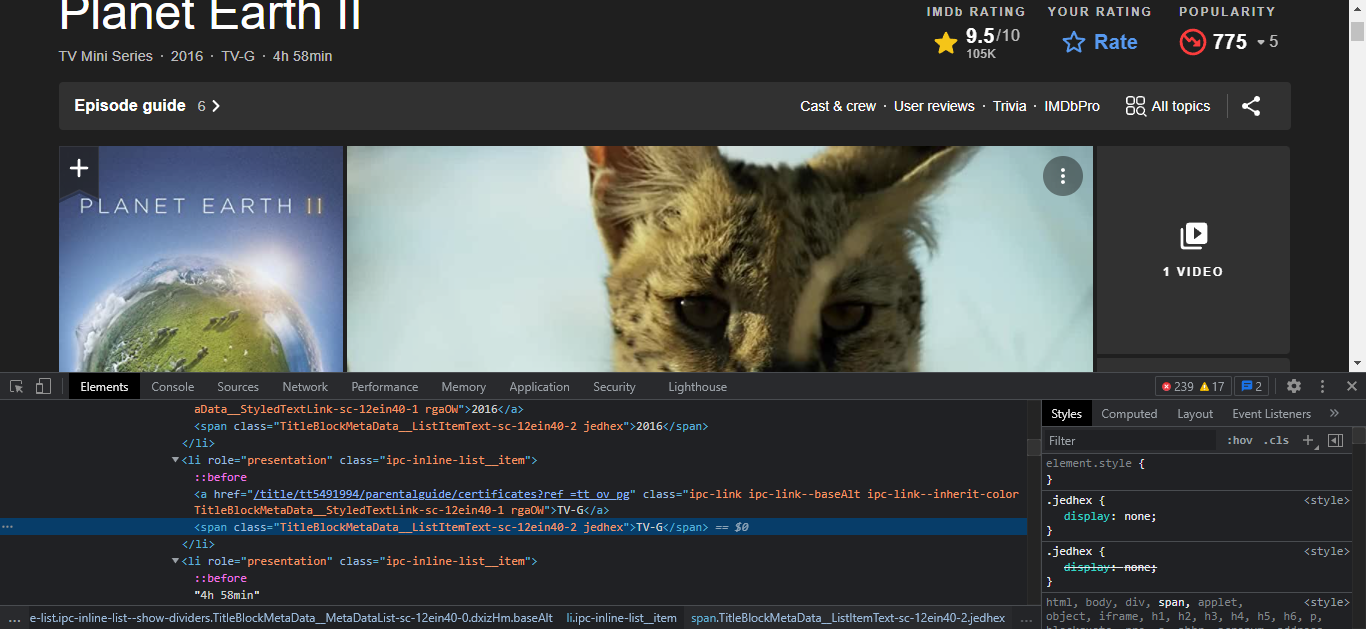

In [117]:
rating_system_class = 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'
rating_system_tag = first_show_content.find_all('span', {'class': x})[-1]
rating_system_tag.text

'TV-G'

**make a function to get ratings system for all shows**

In [118]:
def get_rating_system(links):
 '''
  input -> links: a list of links 
  output -> ratings_system: a list of rating_system for each show 
  '''
  ratings_system = []
  for link in links:
      resp = requests.get(link)
      cont = BeautifulSoup(resp.text, 'html.parser')
      rating_system_tag = cont.find_all('span', {'class':rating_system_class})[-1]
      ratings_system.append(rating_system_tag.text)
  return ratings_system

In [119]:
ratings_system = get_rating_system(links)
ratings_system[:5]

['TV-G', 'TV-PG', 'TV-MA', 'TV-MA', 'TV-MA']

**get top casts for the first show**

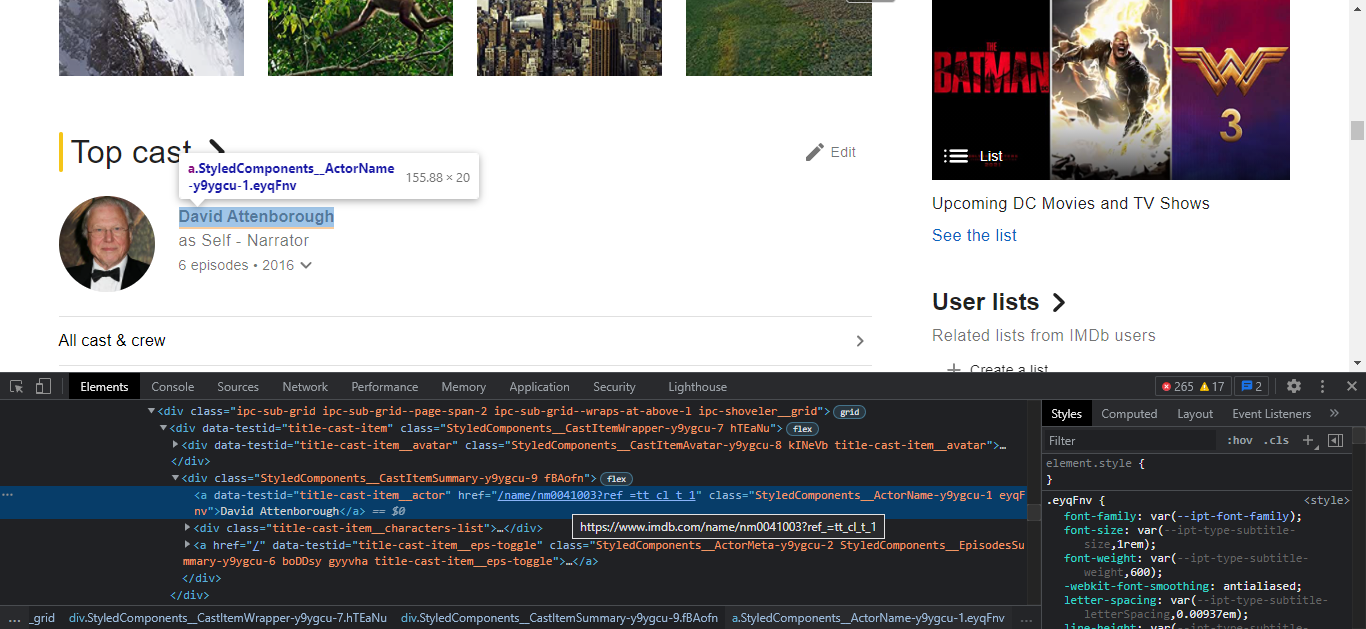

In [121]:
top_cast_class = "StyledComponents__ActorName-y9ygcu-1 eyqFnv"
top_cast_tag = first_show_content.find_all('a', {'class':top_cast_class})
top_cast = ', '.join([x.text for x in top_cast_tag])
top_cast

'David Attenborough'

**make a function to get a list of top casts for every show and assign the result to a list named top_casts**

In [122]:
def get_top_casts(links):
 '''
  input -> links: a list of links 
  output -> top_casts: a list of top_casts for each show 
  '''
  top_casts = []
  for link in links:
      resp = requests.get(link)
      cont = BeautifulSoup(resp.text, 'html.parser')
      top_cast_tag = cont.find_all('a', {'class':top_cast_class})
      top_cast = ', '.join([x.text for x in top_cast_tag])
      top_casts.append(top_cast)
  return top_casts

In [123]:
top_casts = get_top_casts(links)
top_casts[:5]

['David Attenborough',
 'David Attenborough, Sigourney Weaver, Nikolay Drozdov, Thomas Anguti Johnston, Huw Cordey, Doug Allan, Mark Linfield, Doug Anderson, Tom Clarke, Dany Cleyet-Marrel, Justine Evans, Mike Holding, Chadden Hunter, Choi Jen, Tania Jenkins, Jonathan Keeling, Michael Kelem, Simon King',
 'Bryan Cranston, Aaron Paul, Anna Gunn, Betsy Brandt, RJ Mitte, Dean Norris, Bob Odenkirk, Steven Michael Quezada, Jonathan Banks, Giancarlo Esposito, Charles Baker, Jesse Plemons, Christopher Cousins, Laura Fraser, Matt Jones, Michael Shamus Wiles, Lavell Crawford, Ray Campbell',
 'Scott Grimes, Damian Lewis, Ron Livingston, Shane Taylor, Donnie Wahlberg, Peter Youngblood Hills, Matthew Leitch, Nicholas Aaron, Philip Barantini, Michael Cudlitz, Dexter Fletcher, Rick Gomez, James Madio, Ross McCall, Doug Allen, George Calil, Nolan Hemmings, Robin Laing',
 "Jessie Buckley, Jared Harris, Stellan Skarsgård, Adam Nagaitis, Emily Watson, Paul Ritter, Robert Emms, Sam Troughton, Karl Davies

# get all data and make the df 

In [133]:
def make_df():
  dict_to_df = {'rank':ranks,'show name':titles,'IMDb page link':links,'IMDb rating':imdb_ratings,
                '# of ratings':ratings,'genre':genres,'airing years':airing_years,
                'rating system':ratings_system,'top casts':top_casts}

  return pd.DataFrame(dict_to_df)

In [138]:
top_250_shows = make_df()
top_250_shows.head(5)

,rank,show name,IMDb page link,IMDb rating,# of ratings,genre,airing years,rating system,top casts
0,1,Planet Earth II(2016),http://imdb.com/title/tt5491994/,9.5,105000,Documentary,2016,TV-G,David Attenborough
1,2,Planet Earth(2006),http://imdb.com/title/tt0795176/,9.4,174000,Documentary,2006,TV-PG,"David Attenborough, Sigourney Weaver, Nikolay ..."
2,3,Breaking Bad(2008),http://imdb.com/title/tt0903747/,9.4,1600000,"Crime, Drama, Thriller",2008–2013,TV-MA,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B..."
3,4,Band of Brothers(2001),http://imdb.com/title/tt0185906/,9.4,401000,"Action, Drama, History",2001,TV-MA,"Scott Grimes, Damian Lewis, Ron Livingston, Sh..."
4,5,Chernobyl(2019),http://imdb.com/title/tt7366338/,9.3,618000,"Drama, History, Thriller",2019,TV-MA,"Jessie Buckley, Jared Harris, Stellan Skarsgår..."


# Most of  separated functions above just get one feature for all shows(e.g get the imdb ratings only for each shows) And ANY of the functions above takes from 4-5 MINUTES to do it's work, BUT we could make all work with only two functions (convert_to_int, scrap_and_make_csv) and they will TAKE JUST 5 or 6 MINUTES to do all the work(from getting the features to make a csv file) that the other functions do together

In [140]:
def scrap_and_make_csv(content):
  Ranks = []
  Titles = []
  Links = []
  Imdb_Ratings = []
  Ratings = []
  Genres = []
  Airing_Years = []
  Ratings_System = []
  Top_Casts = []


  # all classes 
  rank_title_url_class = 'titleColumn'
  rating_class = "ratingColumn imdbRating"
  num_rating_class = "AggregateRatingButton__TotalRatingAmount-sc-1ll29m0-3 jkCVKJ"
  genre_class = "GenresAndPlot__GenreChip-cum89p-3 fzmeux ipc-chip ipc-chip--on-baseAlt"
  airing_years_class = 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'
  rating_system_class = 'TitleBlockMetaData__ListItemText-sc-12ein40-2 jedhex'
  top_cast_class = "StyledComponents__ActorName-y9ygcu-1 eyqFnv"

  # get titles, ranks, urls
  title_rank_link_tags = content.find_all('td', {'class':rank_title_url_class})
  for tag in title_rank_link_tags:
    title = tag.text
    dot_pos = title.find('.')
    rank = title[:dot_pos].strip()
    title = title[dot_pos+1 : ].strip().replace('\n', '')
    base_link = 'http://imdb.com'
    link = base_link + tag.find('a')['href']
    Titles.append(title)
    Ranks.append(rank)
    Links.append(link)
  
  # get ratings
  Imdb_Ratings_tag = content.find_all('td', {'class':rating_class})
  Imdb_Ratings = [rate.text.strip() for rate in Imdb_Ratings_tag]

  num_rating_class = "AggregateRatingButton__TotalRatingAmount-sc-1ll29m0-3 jkCVKJ"
  for link in Links:
    # get num of rating 
    resp =  requests.get(link)
    cont = BeautifulSoup(resp.text, 'html.parser')
    rating_tag = cont.find('div', {'class':num_rating_class})
    num_of_ratings = convert_to_int(rating_tag.text) # called the convert_to_int() function
    Ratings.append(num_of_ratings)

    # geners
    genre_tag = cont.find_all('a', {'class':genre_class})
    genre = ', '.join([x.text for x in genre_tag])
    Genres.append(genre)

    # airing years 
    airing_years_tag = cont.find('span', {'class':airing_years_class})
    Airing_Years.append(airing_years_tag.text)

    # rating systems
    rating_system_tag = cont.find_all('span', {'class':rating_system_class})[-1]
    Ratings_System.append(rating_system_tag.text)

    # top casts
    top_cast_tag = cont.find_all('a', {'class':top_cast_class})
    top_cast = ', '.join([x.text for x in top_cast_tag])
    Top_Casts.append(top_cast)

  import pandas as pd
  dict_to_df = {'rank':Ranks,'show name':Titles,'IMDb page link':Links,'IMDb rating':Imdb_Ratings,
                '# of ratings':Ratings,'genre':Genres,'airing years':Airing_Years,
                'rating system':Ratings_System,'top casts':Top_Casts}

  return pd.DataFrame(dict_to_df)


In [141]:
top_250_shows = scrap_and_make_csv(content)
top_250_shows.head()

,rank,show name,IMDb page link,IMDb rating,# of ratings,genre,airing years,rating system,top casts
0,1,Planet Earth II(2016),http://imdb.com/title/tt5491994/,9.5,105000,Documentary,2016,TV-G,David Attenborough
1,2,Planet Earth(2006),http://imdb.com/title/tt0795176/,9.4,174000,Documentary,2006,TV-PG,"David Attenborough, Sigourney Weaver, Nikolay ..."
2,3,Breaking Bad(2008),http://imdb.com/title/tt0903747/,9.4,1600000,"Crime, Drama, Thriller",2008–2013,TV-MA,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B..."
3,4,Band of Brothers(2001),http://imdb.com/title/tt0185906/,9.4,401000,"Action, Drama, History",2001,TV-MA,"Scott Grimes, Damian Lewis, Ron Livingston, Sh..."
4,5,Chernobyl(2019),http://imdb.com/title/tt7366338/,9.3,618000,"Drama, History, Thriller",2019,TV-MA,"Jessie Buckley, Jared Harris, Stellan Skarsgår..."


# now save the top_250_shows in a csv file

In [142]:
top_250_shows.to_csv('Top_250_Shows_by_IMDb.csv', index = None)